This file contains the third and final portion of the CTSI example code. It 
imports the dataframe created in the first file and runs machine learning 
classification algorithms to predict whether patients in the 
database are likely to develop an SUD (if any). 
6 different models are included in the analysis; the final output compares 
the training and testing accuracy and F1-score from all of the models.
2 different analyses are run in this code; the first looks at each individual substance abuse diagnosis in order to predict which type a patient may develop and the second combines all of the diagnoses into one variable and looks only at the presence of an SUD.

In [1]:
#Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import  confusion_matrix
from sklearn.metrics import  multilabel_confusion_matrix


import warnings
warnings.filterwarnings('ignore')

First Analysis: Separated SUDs

In [2]:
# Import the dataframe
df = pd.read_csv('df.csv')
df.set_index('person_id',inplace=True)

In [3]:
# Divide the dataset into input and output variables
output = ['alcohol_abuse','cocaine_abuse','hallucinogen_abuse','inhalant_abuse','opioid_abuse','sedative_abuse']
X = df.drop(columns = output)
y = df[output]

# Split the data into training and testing set (80/20)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42, shuffle=True)

print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape:',y_test.shape)

X_train shape: (5952, 49)
X_test shape: (1488, 49)
y_train shape: (5952, 6)
y_test shape: (1488, 6)


Feature 0: 44.932185 	 gender
Feature 1: 11.394080 	 race
Feature 2: 0.042790 	 ethnicity
Feature 3: 2.317531 	 age
Feature 4: 412.342626 	 ingredient
Feature 5: 31.308406 	 Bipolar disorder, depressed
Feature 6: 18.168670 	 Bipolar disorder, manic
Feature 7: 6.712422 	 Bipolar disorder, mixed
Feature 8: 5.802988 	 Bipolar disorder, unspecified
Feature 9: 13.856961 	 Bipolar I disorder, unspecified
Feature 10: 19.928900 	 Bipolar I disorder, depressed
Feature 11: 13.804534 	 Bipolar I disorder, manic
Feature 12: 5.459270 	 Bipolar I disorder, mixed
Feature 13: 8.506881 	 Bipolar II disorder, unspecified
Feature 14: 3.823099 	 Psychosis and severe depression co-occurrent
Feature 15: 106.940653 	 Schizoaffective disorder
Feature 16: 4.018703 	 Abnormal weight gain
Feature 17: 3.627972 	 Abnormal weight loss
Feature 18: 0.169019 	 Adult physical abuse, confirmed, initial encounter
Feature 19: 39.592948 	 Alcohol abuse counseling and surveillance of alcoholic
Feature 20: 0.169019 	 Anorexi

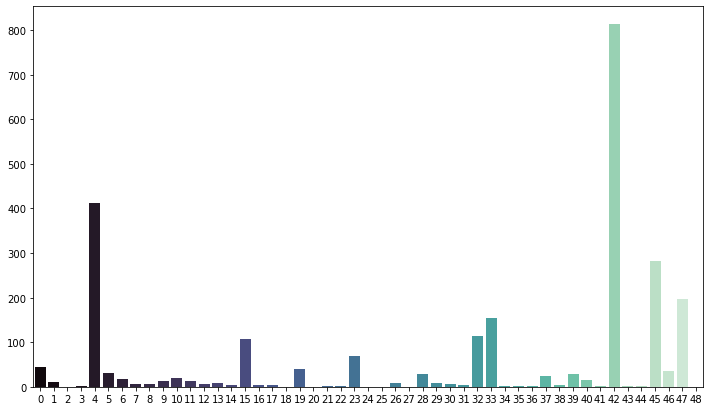

In [4]:
# Chi-squared Feature Selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features(X_train,y_train, X_test)
columns = X.columns.values.tolist()
for i in range(len(fs.scores_)):
    print('Feature %d: %f' %(i, fs.scores_[i]),'\t',columns[i])

fig,ax = plt.subplots(figsize=(12,7))
sns.barplot(x=[i for i in range(len(fs.scores_))],y=fs.scores_,palette='mako')
plt.show()

In [5]:
# Create dictionaries to store the results of the models
result_dict_train = {}
result_dict_test = {}
result_dict_f1 = {}

In [6]:
## MACHINE LEARNING ALGORITHMS

In [7]:
# K-Neighbor Classifier Algorithm
knn = KNeighborsClassifier()
accuracies = cross_val_score(knn, X_train_fs, y_train, cv=5)
knn.fit(X_train_fs, y_train)
y_pred = knn.predict(X_test_fs)


#Evaluate model performance
print('Train Score:',np.mean(accuracies))
print('Test Score:',knn.score(X_test_fs,y_test))
print('\nClassification Report:\n',classification_report(y_test,y_pred,target_names=y_test.columns))
for i in range(len(y_test.columns)):
    confusion_matrix = multilabel_confusion_matrix(y_test, y_pred)[i]
    print('Confusion Matrix for',y_test.columns[i],':\n',confusion_matrix)

#Store results in the dictionaries
result_dict_train['KN'] = np.mean(accuracies)
result_dict_test['KN'] = knn.score(X_test_fs,y_test)
result_dict_f1['KN'] = f1_score(y_test,y_pred,average='weighted')

Train Score: 0.9277546585384784
Test Score: 0.9227150537634409

Classification Report:
                     precision    recall  f1-score   support

     alcohol_abuse       0.00      0.00      0.00        70
     cocaine_abuse       0.00      0.00      0.00        40
hallucinogen_abuse       0.00      0.00      0.00         0
    inhalant_abuse       0.00      0.00      0.00         0
      opioid_abuse       0.00      0.00      0.00        16
    sedative_abuse       0.00      0.00      0.00         2

         micro avg       0.00      0.00      0.00       128
         macro avg       0.00      0.00      0.00       128
      weighted avg       0.00      0.00      0.00       128
       samples avg       0.00      0.00      0.00       128

Confusion Matrix for alcohol_abuse :
 [[1418    0]
 [  70    0]]
Confusion Matrix for cocaine_abuse :
 [[1448    0]
 [  40    0]]
Confusion Matrix for hallucinogen_abuse :
 [[1488    0]
 [   0    0]]
Confusion Matrix for inhalant_abuse :
 [[1488    

In [8]:
# Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state = 42)
accuracies = cross_val_score(dtc, X_train_fs, y_train, cv=5)
dtc.fit(X_train_fs,y_train)
y_pred = dtc.predict(X_test_fs)

#Evaluate model performance
print('Train Score:',np.mean(accuracies))
print('Test Score:',dtc.score(X_test_fs,y_test))
print('\nClassification Report:\n',classification_report(y_test, y_pred,target_names=y_test.columns))
for i in range(len(y_test.columns)):
    confusion_matrix = multilabel_confusion_matrix(y_test, y_pred)[i]
    print('Confusion Matrix for',y_test.columns[i],':\n',confusion_matrix)

#Store results in the dictionaries
result_dict_train['DT'] = np.mean(accuracies)
result_dict_test['DT'] = dtc.score(X_test_fs,y_test)
result_dict_f1['DT'] = f1_score(y_test,y_pred,average='weighted')

Train Score: 0.8746637597104332
Test Score: 0.8729838709677419

Classification Report:
                     precision    recall  f1-score   support

     alcohol_abuse       0.17      0.16      0.16        70
     cocaine_abuse       0.15      0.17      0.16        40
hallucinogen_abuse       0.00      0.00      0.00         0
    inhalant_abuse       0.00      0.00      0.00         0
      opioid_abuse       0.07      0.06      0.06        16
    sedative_abuse       0.00      0.00      0.00         2

         micro avg       0.15      0.15      0.15       128
         macro avg       0.07      0.07      0.07       128
      weighted avg       0.15      0.15      0.15       128
       samples avg       0.01      0.01      0.01       128

Confusion Matrix for alcohol_abuse :
 [[1365   53]
 [  59   11]]
Confusion Matrix for cocaine_abuse :
 [[1409   39]
 [  33    7]]
Confusion Matrix for hallucinogen_abuse :
 [[1488    0]
 [   0    0]]
Confusion Matrix for inhalant_abuse :
 [[1488    

In [9]:
# Random Forest Classifier
rfc = RandomForestClassifier(random_state = 42)
accuracies = cross_val_score(rfc, X_train_fs, y_train, cv=5)
rfc.fit(X_train_fs,y_train)
y_pred = rfc.predict(X_test_fs)
 
#Evaluate model performance
print('Train Score:',np.mean(accuracies))
print('Test Score:',rfc.score(X_test_fs,y_test))
print('\nClassification Report:\n',classification_report(y_test, y_pred,target_names=y_test.columns))
for i in range(len(y_test.columns)):
    confusion_matrix = multilabel_confusion_matrix(y_test, y_pred)[i]
    print('Confusion Matrix for',y_test.columns[i],':\n',confusion_matrix)

#Store results in the dictionaries
result_dict_train['RF'] = np.mean(accuracies)
result_dict_test['RF'] = rfc.score(X_test_fs,y_test)
result_dict_f1['RF'] = f1_score(y_test,y_pred,average='weighted')

Train Score: 0.9223779184217769
Test Score: 0.9153225806451613

Classification Report:
                     precision    recall  f1-score   support

     alcohol_abuse       0.25      0.06      0.09        70
     cocaine_abuse       0.31      0.10      0.15        40
hallucinogen_abuse       0.00      0.00      0.00         0
    inhalant_abuse       0.00      0.00      0.00         0
      opioid_abuse       0.00      0.00      0.00        16
    sedative_abuse       0.00      0.00      0.00         2

         micro avg       0.26      0.06      0.10       128
         macro avg       0.09      0.03      0.04       128
      weighted avg       0.23      0.06      0.10       128
       samples avg       0.00      0.00      0.00       128

Confusion Matrix for alcohol_abuse :
 [[1406   12]
 [  66    4]]
Confusion Matrix for cocaine_abuse :
 [[1439    9]
 [  36    4]]
Confusion Matrix for hallucinogen_abuse :
 [[1488    0]
 [   0    0]]
Confusion Matrix for inhalant_abuse :
 [[1488    

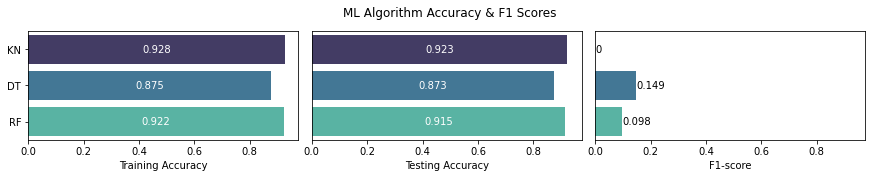

In [10]:
## COMPARING ACCURACY SCORES
df_result_train = pd.DataFrame.from_dict(result_dict_train,orient = "index",columns=["Train Score"])
df_result_test = pd.DataFrame.from_dict(result_dict_test,orient = "index",columns=["Test Score"])
df_result_f1 = pd.DataFrame.from_dict(result_dict_f1,orient = "index",columns=["F1-score"])
df_results = pd.concat([df_result_train,df_result_test,df_result_f1],axis=1)

# visualizing the scores 
fig,ax = plt.subplots(1,3,figsize=(15,2),sharex=True)
fig.subplots_adjust(wspace=0.05)
g1=sns.barplot(y = df_result_train.index,x = df_result_train['Train Score'].round(3),ax = ax[0],palette='mako')
g2=sns.barplot(y = df_result_test.index,x = df_result_test['Test Score'].round(3),ax = ax[1],palette='mako')
g3=sns.barplot(y = df_result_f1.index,x = df_result_f1['F1-score'].round(3),ax=ax[2],palette='mako')
g1.set(xlabel='Training Accuracy')
g1.bar_label(g1.containers[0],label_type='center',color='white')
g2.set(xlabel='Testing Accuracy')
g2.bar_label(g2.containers[0],label_type='center',color='white')
g2.set(yticklabels=[])
g2.tick_params(left=False)
g3.set(xlabel='F1-score')
g3.bar_label(g3.containers[0],label_type='edge',color='black')
g3.set(yticklabels=[])
g3.tick_params(left=False)
g3.set_xlim(0)
plt.suptitle('ML Algorithm Accuracy & F1 Scores',fontsize=12,x=0.515,y=1.05)
plt.show()

Second Analysis: Combined SUDs

In [11]:
# Import the dataframe
df1 = pd.read_csv('df.csv')
df1.set_index('person_id',inplace=True)

In [12]:
# Edit the dataframe
# combine the output columns into one SUD column
df1['SUD'] = df1.iloc[:,49:].max(1)
df1.drop(df1.iloc[:,49:55],axis=1,inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7440 entries, 1 to 7428
Data columns (total 50 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   gender                                                                          7440 non-null   int64  
 1   race                                                                            7440 non-null   int64  
 2   ethnicity                                                                       7440 non-null   int64  
 3   age                                                                             7440 non-null   float64
 4   ingredient                                                                      7440 non-null   int64  
 5   Bipolar disorder, depressed                                                     7440 non-null   int64  
 6   Bipolar disorder

In [13]:
# Divide the dataset into input and output variables
output = ['SUD']
X = df1.drop(columns = output)
y = df1[output]

# Split the data into training and testing set (80/20)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42,shuffle=True)

print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape:',y_test.shape)

X_train shape: (5952, 49)
X_test shape: (1488, 49)
y_train shape: (5952, 1)
y_test shape: (1488, 1)


Feature 0: 30.351008 	 gender
Feature 1: 2.238782 	 race
Feature 2: 0.003681 	 ethnicity
Feature 3: 0.059875 	 age
Feature 4: 284.916590 	 ingredient
Feature 5: 19.558884 	 Bipolar disorder, depressed
Feature 6: 0.019867 	 Bipolar disorder, manic
Feature 7: 3.443353 	 Bipolar disorder, mixed
Feature 8: 3.398932 	 Bipolar disorder, unspecified
Feature 9: 6.920138 	 Bipolar I disorder, unspecified
Feature 10: 0.084178 	 Bipolar I disorder, depressed
Feature 11: 0.014668 	 Bipolar I disorder, manic
Feature 12: 3.655281 	 Bipolar I disorder, mixed
Feature 13: 0.099521 	 Bipolar II disorder, unspecified
Feature 14: 0.403422 	 Psychosis and severe depression co-occurrent
Feature 15: 30.227707 	 Schizoaffective disorder
Feature 16: 1.789923 	 Abnormal weight gain
Feature 17: 1.030474 	 Abnormal weight loss
Feature 18: 0.153011 	 Adult physical abuse, confirmed, initial encounter
Feature 19: 16.120065 	 Alcohol abuse counseling and surveillance of alcoholic
Feature 20: 0.153011 	 Anorexia
Feat

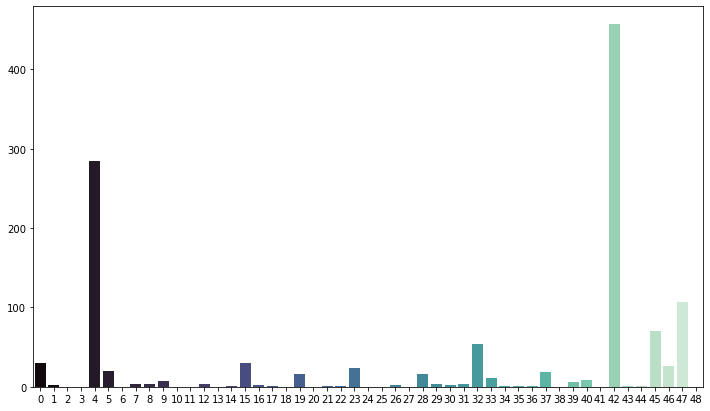

In [14]:
# Chi-squared Feature Selection
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features(X_train,y_train, X_test)
columns = X.columns.values.tolist()
for i in range(len(fs.scores_)):
    print('Feature %d: %f' %(i, fs.scores_[i]),'\t',columns[i])

fig,ax = plt.subplots(figsize=(12,7))
sns.barplot(x=[i for i in range(len(fs.scores_))],y=fs.scores_,palette='mako')
plt.show()

In [15]:
# Create dictionaries to store the results of the models
result_dict_train = {}
result_dict_test = {}
result_dict_f1 = {}

In [16]:
## Logistic Regression
reg = LogisticRegression(random_state = 42)
accuracies = cross_val_score(reg, X_train_fs, y_train, cv=5)
reg.fit(X_train_fs,y_train)
y_pred = reg.predict(X_test_fs)

from sklearn.metrics import  confusion_matrix
 
#Evaluate model performance
print("Train Score:",np.mean(accuracies))
print("Test Score:",reg.score(X_test_fs,y_test))
print('\nClassification Report:\n',classification_report(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))

#Store results in the dictionaries
result_dict_train['LR'] = np.mean(accuracies)
result_dict_test['LR'] = reg.score(X_test_fs,y_test)
result_dict_f1['LR'] = f1_score(y_test,y_pred,average='weighted')

Train Score: 0.932794981972638
Test Score: 0.926747311827957

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      1373
           1       0.64      0.12      0.20       115

    accuracy                           0.93      1488
   macro avg       0.78      0.56      0.58      1488
weighted avg       0.91      0.93      0.90      1488

Confusion Matrix:
 [[1365    8]
 [ 101   14]]


In [17]:
## Support Vector Classifier
svc = SVC(random_state = 42)
accuracies = cross_val_score(svc, X_train_fs, y_train, cv=5)
svc.fit(X_train_fs,y_train)
y_pred = svc.predict(X_test_fs)
 
#Evaluate model performance
print("Train Score:",np.mean(accuracies))
print("Test Score:",svc.score(X_test_fs,y_test))
print('\nClassification Report:\n',classification_report(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))

#Store results in the dictionaries
result_dict_train['SVM'] = np.mean(accuracies)
result_dict_test['SVM'] = svc.score(X_test_fs,y_test)
result_dict_f1['SVM'] = f1_score(y_test,y_pred,average='weighted')

Train Score: 0.9289315524698545
Test Score: 0.9227150537634409

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      1373
           1       0.00      0.00      0.00       115

    accuracy                           0.92      1488
   macro avg       0.46      0.50      0.48      1488
weighted avg       0.85      0.92      0.89      1488

Confusion Matrix:
 [[1373    0]
 [ 115    0]]


In [18]:
## Naive Bayes Classifier
gnb = GaussianNB()
accuracies = cross_val_score(gnb, X_train_fs, y_train, cv=5)
gnb.fit(X_train_fs,y_train)
y_pred = gnb.predict(X_test_fs)
 
#Evaluate model performance
print("Train Score:",np.mean(accuracies))
print("Test Score:",gnb.score(X_test_fs,y_test))
print('\nClassification Report:\n',classification_report(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))

#Store results in the dictionaries
result_dict_train['NB'] = np.mean(accuracies)
result_dict_test['NB'] = gnb.score(X_test_fs,y_test)
result_dict_f1['NB'] = f1_score(y_test,y_pred,average='weighted')

Train Score: 0.10097284253751877
Test Score: 0.11290322580645161

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.04      0.08      1373
           1       0.08      0.97      0.15       115

    accuracy                           0.11      1488
   macro avg       0.51      0.51      0.11      1488
weighted avg       0.88      0.11      0.08      1488

Confusion Matrix:
 [[  56 1317]
 [   3  112]]


In [19]:
# K-Neighbor Classifier Algorithm
knn = KNeighborsClassifier()
accuracies = cross_val_score(knn, X_train_fs, y_train, cv=5)
knn.fit(X_train_fs, y_train)
y_pred = knn.predict(X_test_fs)

#Evaluate model performance
print('Train Score:',np.mean(accuracies))
print('Test Score:',knn.score(X_test_fs,y_test))
print('\nClassification Report:\n',classification_report(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))

#Store results in the dictionaries
result_dict_train['KN'] = np.mean(accuracies)
result_dict_test['KN'] = knn.score(X_test_fs,y_test)
result_dict_f1['KN'] = f1_score(y_test,y_pred,average='weighted')

Train Score: 0.9269151690903061
Test Score: 0.9220430107526881

Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      1373
           1       0.33      0.01      0.02       115

    accuracy                           0.92      1488
   macro avg       0.63      0.50      0.49      1488
weighted avg       0.88      0.92      0.89      1488

Confusion Matrix:
 [[1371    2]
 [ 114    1]]


In [20]:
# Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state = 42)
accuracies = cross_val_score(dtc, X_train_fs, y_train, cv=5)
dtc.fit(X_train_fs,y_train)
y_pred = dtc.predict(X_test_fs)

#Evaluate model performance
print('Train Score:',np.mean(accuracies))
print('Test Score:',dtc.score(X_test_fs,y_test))
print('\nClassification Report:\n',classification_report(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))

#Store results in the dictionaries
result_dict_train['DT'] = np.mean(accuracies)
result_dict_test['DT'] = dtc.score(X_test_fs,y_test)
result_dict_f1['DT'] = f1_score(y_test,y_pred,average='weighted')

Train Score: 0.884406719866788
Test Score: 0.8897849462365591

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94      1373
           1       0.23      0.18      0.20       115

    accuracy                           0.89      1488
   macro avg       0.58      0.57      0.57      1488
weighted avg       0.88      0.89      0.88      1488

Confusion Matrix:
 [[1303   70]
 [  94   21]]


In [21]:
# Random Forest Classifier
rfc = RandomForestClassifier(random_state = 42)
accuracies = cross_val_score(rfc, X_train_fs, y_train, cv=5)
rfc.fit(X_train_fs,y_train)
y_pred = rfc.predict(X_test_fs)
 
#Evaluate model performance
print('Train Score:',np.mean(accuracies))
print('Test Score:',rfc.score(X_test_fs,y_test))
print('\nClassification Report:\n',classification_report(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))

#Store results in the dictionaries
result_dict_train['RF'] = np.mean(accuracies)
result_dict_test['RF'] = rfc.score(X_test_fs,y_test)
result_dict_f1['RF'] = f1_score(y_test,y_pred,average='weighted')

Train Score: 0.9264092740370709
Test Score: 0.9166666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96      1373
           1       0.40      0.16      0.23       115

    accuracy                           0.92      1488
   macro avg       0.67      0.57      0.59      1488
weighted avg       0.89      0.92      0.90      1488

Confusion Matrix:
 [[1346   27]
 [  97   18]]


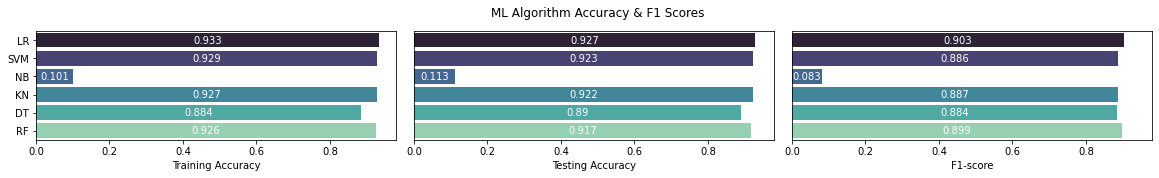

In [22]:
## COMPARING ACCURACY SCORES
df_result_train = pd.DataFrame.from_dict(result_dict_train,orient = "index", columns=["Train Score"])
df_result_test = pd.DataFrame.from_dict(result_dict_test,orient = "index",columns=["Test Score"])
df_result_f1 = pd.DataFrame.from_dict(result_dict_f1,orient = "index",columns=["F1-score"])
df_results = pd.concat([df_result_train,df_result_test,df_result_f1],axis=1)

# visualizing the scores 
fig,ax = plt.subplots(1,3,figsize=(20,2),sharex=True)
fig.subplots_adjust(wspace=0.05)
g1=sns.barplot(y = df_result_train.index,x = df_result_train['Train Score'].round(3),ax = ax[0],palette='mako')
g2=sns.barplot(y = df_result_test.index,x = df_result_test['Test Score'].round(3),ax = ax[1],palette='mako')
g3=sns.barplot(y = df_result_f1.index,x = df_result_f1['F1-score'].round(3),ax=ax[2],palette='mako')
g1.set(xlabel='Training Accuracy')
g1.bar_label(g1.containers[0],label_type='center',color='white')
g2.set(xlabel='Testing Accuracy')
g2.bar_label(g2.containers[0],label_type='center',color='white')
g2.set(yticklabels=[])
g2.tick_params(left=False)
g3.set(xlabel='F1-score')
g3.bar_label(g3.containers[0],label_type='center',color='white')
g3.set(yticklabels=[])
g3.tick_params(left=False)
g3.set_xlim(0)
plt.suptitle('ML Algorithm Accuracy & F1 Scores',fontsize=12,x=0.515,y=1.05)
plt.show()